## ggplot2: Exploring Datastets
* More on ggplot.
* Examining some new data.
* 1-D summaries;
* Effective use of Categorical Variables, Facets, and Small-Multiples

### Reminder
* There are two ways to learn R: the easy way and the tedious way.
* The problem is that the easy way doesn't work.
* You have to practice the examples and work through them manually. Type them out, even if you're just copying at the beginning. It really will help you get used to how the language works.

In [1]:
gapminder.url <- "https://raw.githubusercontent.com/socviz/soc880/master/data/gapminder.csv"
my.data <- read.csv(url(gapminder.url))
dim(my.data)

[1] 1704    6

In [2]:
head(my.data)

country continent year lifeExp      pop gdpPercap
1 Algeria    Africa 1952  43.077  9279525  2449.008
2 Algeria    Africa 1957  45.685 10270856  3013.976
3 Algeria    Africa 1962  48.303 11000948  2550.817
4 Algeria    Africa 1967  51.407 12760499  3246.992
5 Algeria    Africa 1972  54.518 14760787  4182.664
6 Algeria    Africa 1977  58.014 17152804  4910.417

In [3]:
require(ggplot2)

Loading required package: ggplot2


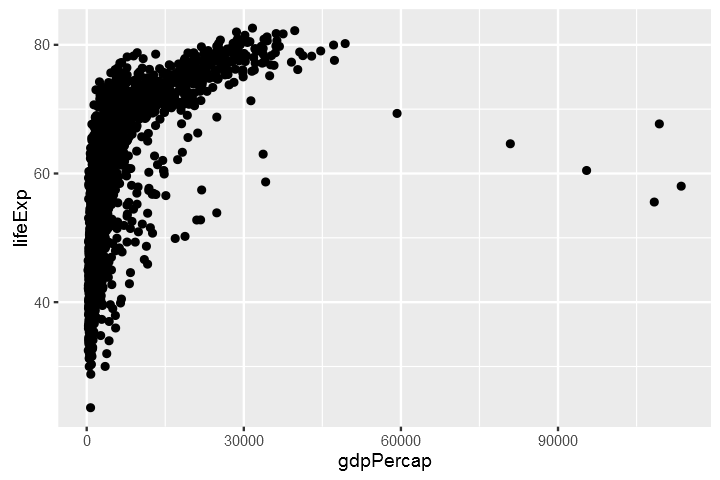

In [4]:
options(repr.plot.width = 6, repr.plot.height = 4)
p = ggplot(data = my.data, aes(x = gdpPercap, y = lifeExp))
p + geom_point()

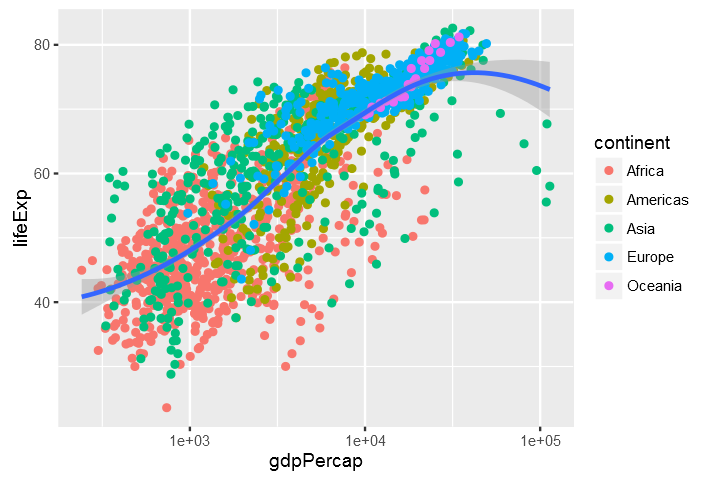

In [5]:
p + geom_point(aes(color= continent)) +
geom_smooth(method = "loess") + 
scale_x_log10()

** Layer functions have options other than aesthetic mappings. These don't go in inside the aes() function **

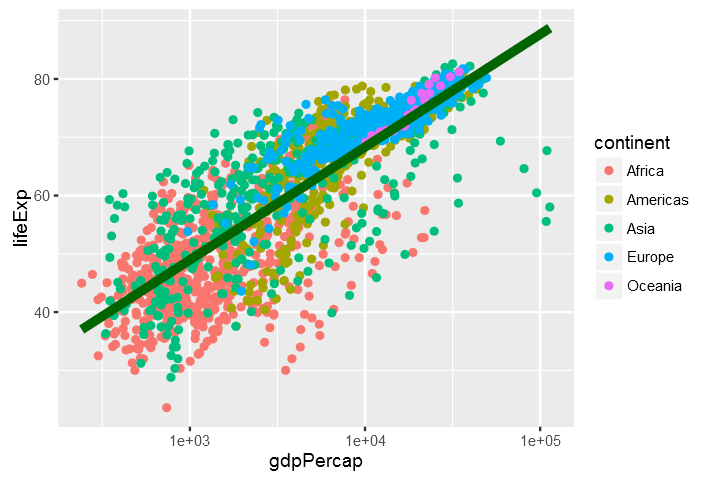

In [6]:
p + geom_point(aes(color = continent)) + 
geom_smooth(color = "darkgreen", se = FALSE, size = 2, method = "lm") + 
scale_x_log10()

** First geoms, then scales, then labels, theme elements, and titles  **

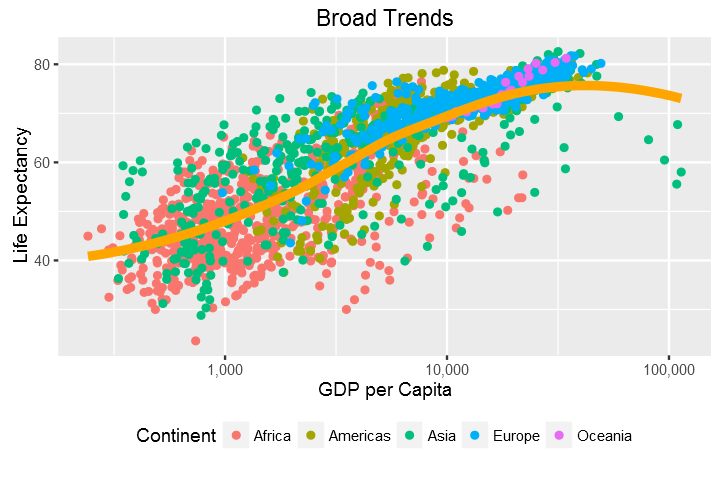

In [7]:
library(scales)

p + geom_point(aes(color = continent)) + 
geom_smooth(color = "orange", method = "loess", se=FALSE, size = 2) +
scale_x_log10(labels = comma) +
labs(x = "GDP per Capita",
    y = "Life Expectancy",
    color = "Continent") +
theme(legend.position = "bottom") +
ggtitle("Broad Trends")

** When ggplot misbehaves or gives unexpected output, it is usually because the mapping you have specified is not what you need, or the variable is not appropriate to the aesthetic feature in some way ** 

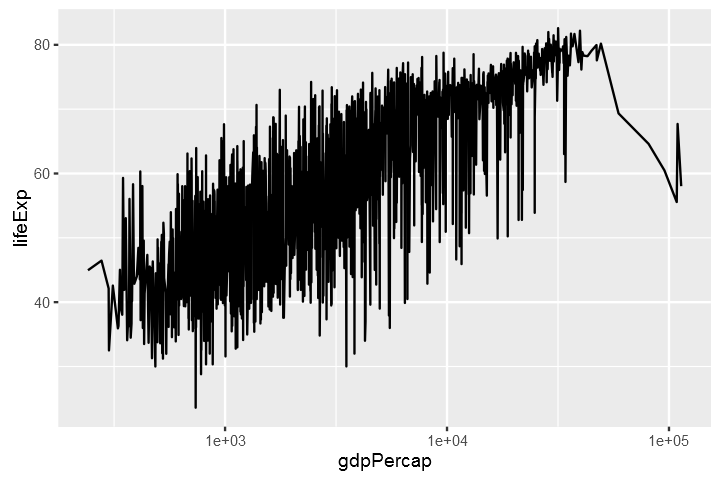

In [8]:
p = ggplot(data = my.data, aes(x = gdpPercap, y = lifeExp))

p + geom_line() + 
scale_x_log10()

** What's wrong with this picture?**

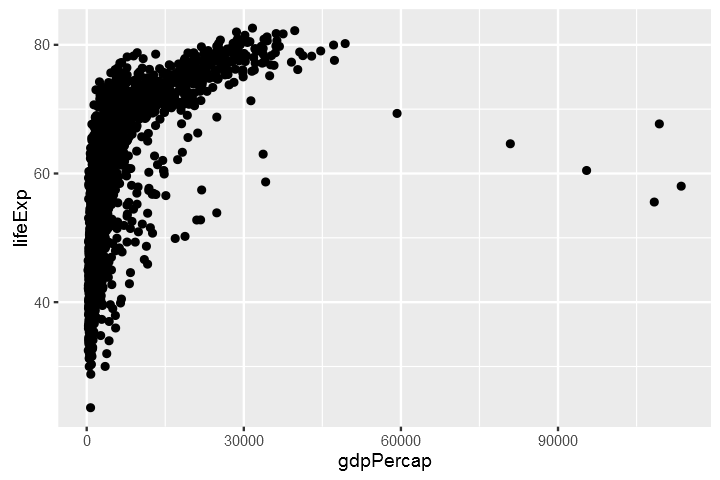

In [9]:
p + geom_point()

** Put year on the x-axis** 

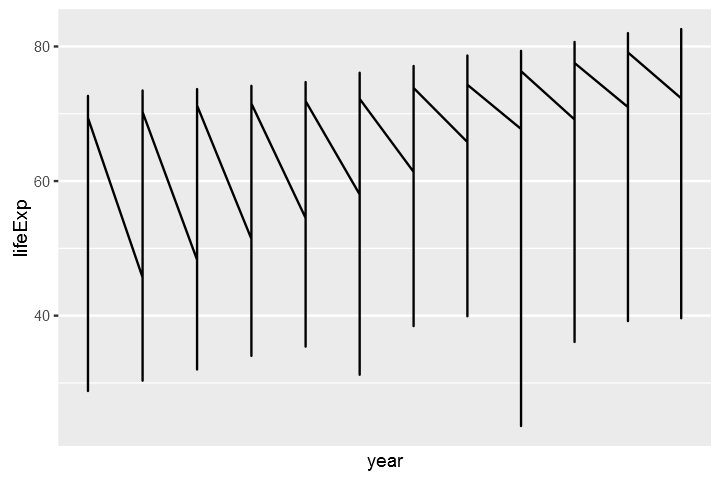

In [10]:
p = ggplot(my.data, aes(x = year, y = lifeExp))

p + geom_line() + 
scale_x_log10()

* Hmm, not much better
* Also, why are there no x labels for years?

In [11]:
class(my.data$year)

[1] "integer"

In [12]:
my.data$year[1:10]

[1] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997

In [13]:
log10(my.data$year[1:10])

[1] 3.290480 3.291591 3.292699 3.293804 3.294907 3.296007 3.297104 3.298198
 [9] 3.299289 3.300378

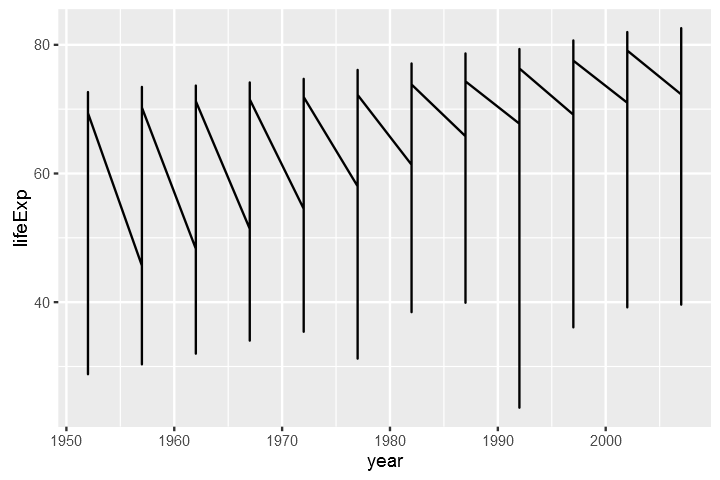

In [14]:
p <- ggplot(my.data,
            aes(x=year, y=lifeExp))
p + geom_line() 

* Fix the scale.
* The plot is still meaningless, unfortunately

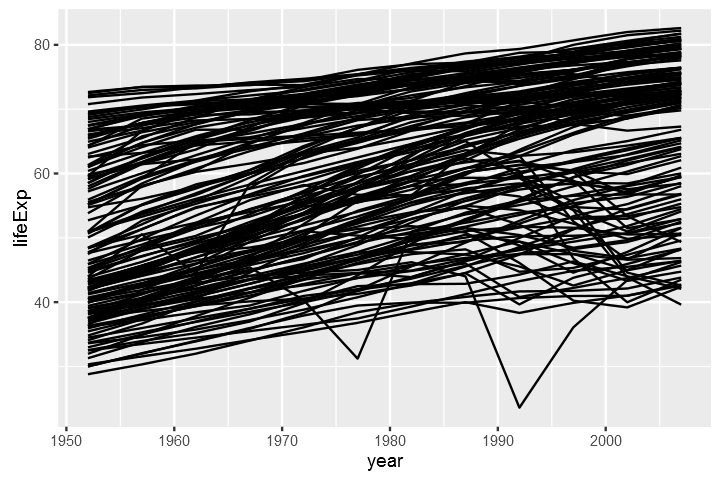

In [15]:
p = ggplot(my.data, aes(x = year, y = lifeExp))
p + geom_line(aes(group = country))

* ** More promising **

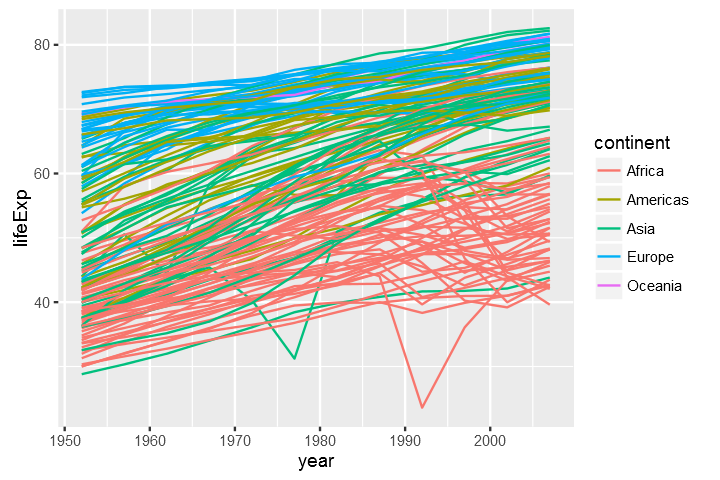

In [16]:
p = ggplot(my.data, aes(x=year, y=lifeExp))
p + geom_line(aes(group = country,
                 color=continent))

** Let's just look at Asia **

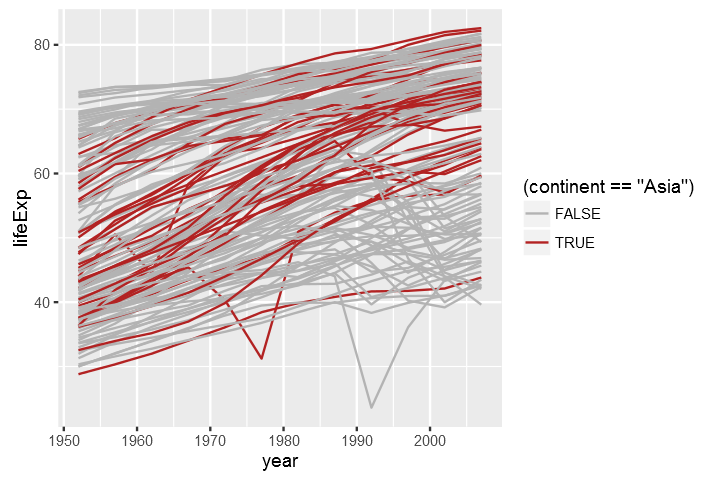

In [17]:
p = ggplot(my.data, aes(x = year, y = lifeExp))
p + geom_line(aes(group = country,
                 color=(continent == "Asia"))) + scale_color_manual(values = c("gray70", "firebrick"))
